# Download all data from synapse and save into pickle

In [7]:
import synapseclient
import synapseutils

syn = synapseclient.Synapse()
syn.login('adnama547','password') ### do not publish password!!!

Welcome, Amanda Paulson!



In [125]:
#download dicoms into 'files' - takes ~30-40 minutes; couldn't figure out how to suppress warnings
#files = synapseutils.syncFromSynapse(syn, 'syn20608511')

In [13]:
import pickle

In [14]:
filename = 'all_data'
outfile = open(filename,'wb')

pickle.dump(files,outfile)
outfile.close()

In [97]:
print(len(files))
print(files[20])
dicoms=[x for x in files if 'dcm' in x.path]
len(dicoms)

1999
File: 001-25.0.dcm (syn20705924)
  md5=344394361df92b498dc3a6a3c5694391
  fileSize=718226
  contentType=application/dicom
  externalURL=None
  cacheDir=/home/jupyter/.synapseCache/713/42802713
  files=['001-25.0.dcm']
  path=/home/jupyter/.synapseCache/713/42802713/001-25.0.dcm
  synapseStore=True
properties:
  concreteType=org.sagebionetworks.repo.model.FileEntity
  createdBy=3342573
  createdOn=2019-09-04T05:11:52.020Z
  dataFileHandleId=42802713
  etag=fc04e4d4-d0a5-41b4-b30c-45de9179ee8b
  id=syn20705924
  modifiedBy=3342573
  modifiedOn=2019-09-06T21:41:47.597Z
  name=001-25.0.dcm
  parentId=syn20705917
  versionLabel=1
  versionNumber=1
annotations:
  assay=['MRI']
  dataSubtype=['raw']
  dataType=['image']
  diagnosis=['Schwannomatosis']
  experimentalCondition=['*tse2d1_3']
  fileFormat=['DICOM']
  fundingAgency=['CTF, DoD, NIH']
  individualID=['MGH_WBMRI_patient_010']
  individualId=['MGH_WBMRI_patient_010']
  isCellLine=['FALSE']
  nf1Genotype=['unknown']
  nf2Genotype=

1899

In [126]:
stirs=[x for x in dicoms if 'tir' in x.experimentalCondition[0]]
t1s=[x for x in dicoms if 'tse' in x.experimentalCondition[0]]
print(len(stirs), len(t1s))

# 052 doesn't have T1

960 939


## Examine images

In [42]:
import skimage as sk
from matplotlib import pyplot as plt
import pydicom
test_img=pydicom.dcmread(files[10].path)

plt.imshow(test_img.pixel_array.T)

In [113]:
seg_zip=files[1998].path
import zipfile
archive = zipfile.ZipFile(seg_zip, 'r')
archive.extractall(path='/home/jupyter')

In [115]:
import nibabel
seg=nibabel.load('/home/jupyter/segmentation_50cases/segmentation-010.nii.gz')
seg

In [122]:
img=seg.get_data()
print(seg.affine)
print(img.shape)

[[-1.5625  0.      0.     -0.    ]
 [ 0.     -1.5625  0.     -0.    ]
 [ 0.      0.     10.      0.    ]
 [ 0.      0.      0.      1.    ]]
(322, 1086, 20)


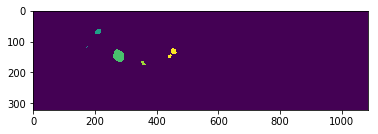

In [123]:
plt.imshow(img[:,:,10])

## Place dicoms into folders, create niftis, and then it should work with Michael's code

In [142]:
#exclude 32, 36 and 52
patients=['107', '053', '023', '010', '102', '123', '097', 
      '087', '048', '089', '222', '077', '065', '106', '098', 
      '158', '035', '081', '127', '119', '120', '268', '090', 
      '085', '224', '144', '114', '225', '063', '099', '279', 
      '019', '045', '088', '196', '095', '227', '136', '069', 
      '109', '076', '046', '061', '072', '027', '138', '047']
patients.sort()

In [159]:
import os
from shutil import copyfile
import dcmstack
from glob import glob


prefix='/home/jupyter/WBMRI'
for this_patient in patients:
    folder_path=prefix+this_patient
    
    #make directory
    #os.mkdir(folder_path)
    
    #get file paths for that patient
    stir_file_paths=[x.path for x in stirs if this_patient in x.individualID[0]]
    stir_file_names=[x.files[0] for x in stirs if this_patient in x.individualID[0]]
    t1_file_paths=[x.path for x in t1s if this_patient in x.individualID[0]]
    t1_file_names=[x.files[0] for x in t1s if this_patient in x.individualID[0]]
    
    #copy dicoms into directory
    for i in range(0,len(stir_file_paths)):
        copyfile(stir_file_paths[i], folder_path+'/'+stir_file_names[i])
        
    src_dcms = glob(os.path.join(folder_path, '*.dcm'))
    stacks = dcmstack.parse_and_stack(src_dcms)
    stack = stacks.values[0]
    nii = stack.to_nifti()
    nii.to_filename(this_patient+'_stir.nii.gz')

TypeError: 'builtin_function_or_method' object is not subscriptable

In [137]:
stir_file_paths=[x.path for x in stirs if '010' in x.individualID[0]]
t1_file_paths=[x.path for x in t1s if '010' in x.individualID[0]]

In [163]:
folder_path=prefix+this_patient
src_dcms = glob(os.path.join(folder_path, '*.dcm'))
src_dcms
stacks = dcmstack.parse_and_stack(src_dcms)
stacks.values[0]

TypeError: 'builtin_function_or_method' object is not subscriptable

In [164]:
stacks

OrderedDict([(('1.3.6.1.4.1.5962.99.1.3785683421.1058084306.1567153811933.104.0',
               29,
               'SPINE',
               (1.0, 0.0, 0.0, 0.0, 0.0, -1.0)),
              <dcmstack.dcmstack.DicomStack at 0x7f7d5a5b4470>)])

In [139]:
import shutil

In [154]:
pip install dcmstack

    100% |████████████████████████████████| 51kB 3.6MB/s 
  Stored in directory: /home/jupyter/.cache/pip/wheels/74/f3/63/abd014d755b6dcacb074366b2494e488da8200d5b43ff37617
Successfully built dcmstack
Note: you may need to restart the kernel to use updated packages.
